In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook")

import warnings
warnings.filterwarnings("ignore")

import glob
filelist = glob.glob("stock-data-dow-jones/*.csv")

from fastai.tabular import add_datepart

In [49]:
# Load data
AAPL = pd.read_csv('stock-data-dow-jones/AAPL.csv', sep=',', index_col=0, parse_dates=True)
cols = ['open', 'high', 'low', 'close', 'volume']
AAPL = AAPL[cols].copy()

df_stocks = pd.DataFrame()

for file in filelist:
    # Exclude DWDP since it was recently added to the DOW
    if 'DWDP.csv' in file:
        continue
    df = pd.read_csv(file)
    df['symbol'] = file.split('/')[-1].split('.')[0]
    df_stocks = df_stocks.append(df)

cols = ['date', 'close', 'volume', 'symbol']
df_stocks = df_stocks[cols].copy()
df_stocks['date'] = pd.to_datetime(df_stocks['date'])

# Create a dataframe of closing prices for each stock
df = df_stocks.pivot(index='date', columns='symbol', values='close')

df.head()

symbol,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,GS,HD,IBM,...,PFE,PG,TRV,UNH,UTX,V,VZ,WBA,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
2014-02-21,68.9821,82.2720,112.8920,83.4824,18.8421,92.1690,74.6463,153.7179,69.8159,152.3849,...,26.3114,66.3520,74.7163,68.2609,102.5660,53.9535,37.6033,60.9569,63.8826,78.7855
2014-02-24,69.2841,83.3566,114.0449,83.3283,18.8335,93.3714,75.2052,155.6242,69.9326,152.9351,...,26.7547,66.2584,74.4042,70.2955,103.5527,54.6371,36.7760,61.1408,64.0836,79.9545
2014-02-25,68.5631,83.3473,111.5720,82.5491,18.5951,94.0422,74.7208,152.7648,72.7256,152.7517,...,26.6710,66.4797,74.3151,69.6574,103.0193,54.8593,36.8238,61.5360,64.0836,79.8467
2014-02-26,67.9446,83.1804,111.4224,83.2256,18.6718,94.4839,74.5997,152.6428,73.3722,153.4436,...,26.7547,66.2584,74.3953,70.3418,103.2149,54.6177,36.8715,61.1316,65.3329,79.4156
2014-02-27,69.2999,83.6996,113.1385,82.7974,18.6633,94.6311,74.9724,155.0618,73.6147,154.4523,...,26.9554,66.5392,74.7698,70.3048,103.6594,54.6588,37.7863,62.6757,65.1407,79.4571


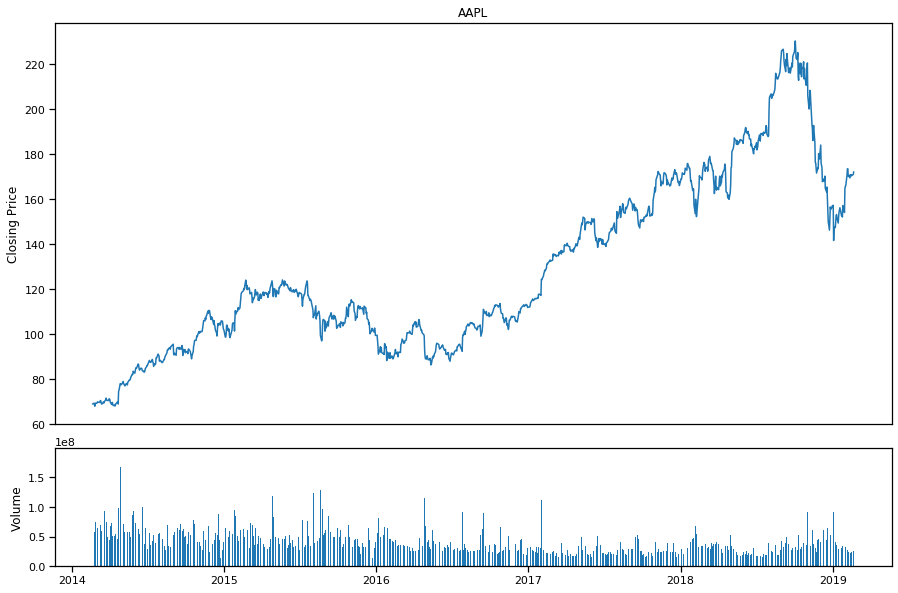

In [8]:
plt.figure(figsize=(15,10))
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
top.plot(AAPL.index, AAPL.close) 
bottom.bar(AAPL.index, AAPL.volume) 
 
# set the labels
top.axes.get_xaxis().set_visible(False)
top.set_title('AAPL')
top.set_ylabel('Closing Price')
bottom.set_ylabel('Volume');

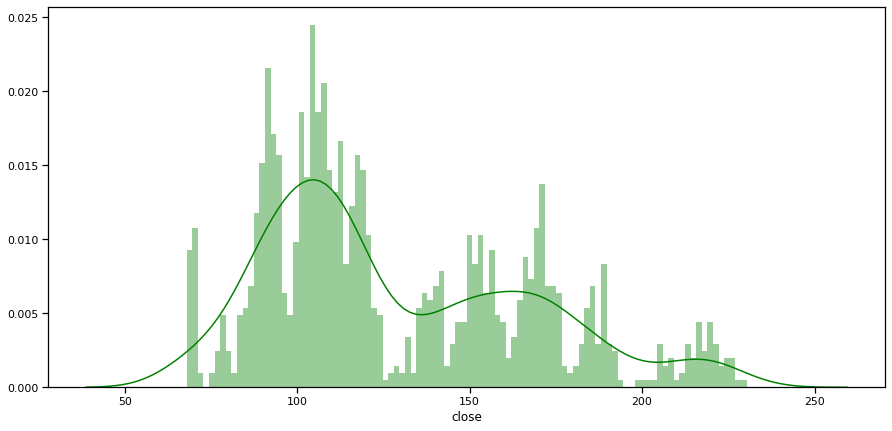

In [16]:
plt.figure(figsize=(15,7))
sns.distplot(AAPL.close.dropna(), bins=100, color='green');

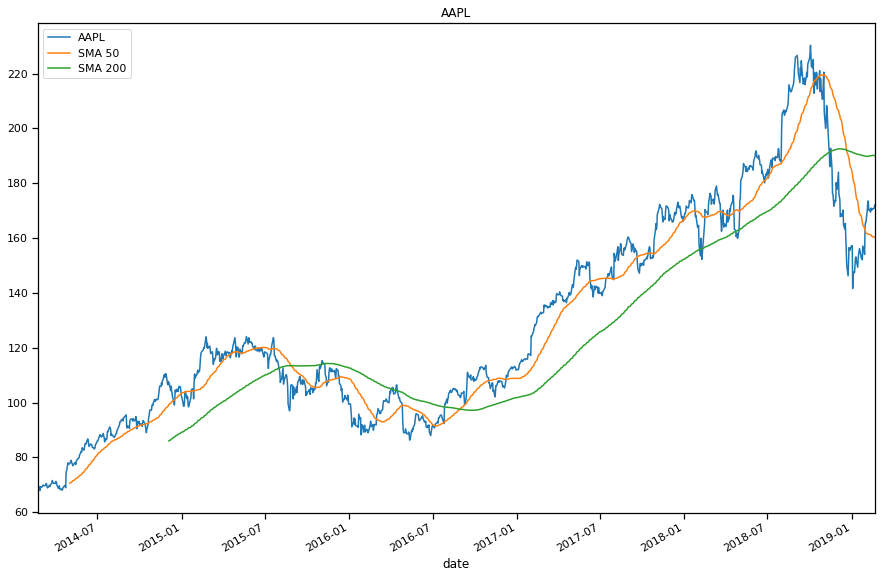

In [26]:
sma50 = AAPL['close'].rolling(50).mean()
sma200 = AAPL['close'].rolling(200).mean()
 
AAPL_sma = pd.DataFrame({'AAPL': AAPL.close, 'SMA 50': sma50, 'SMA 200': sma200})
AAPL_sma.plot(figsize=(15, 10), legend=True, title='AAPL');

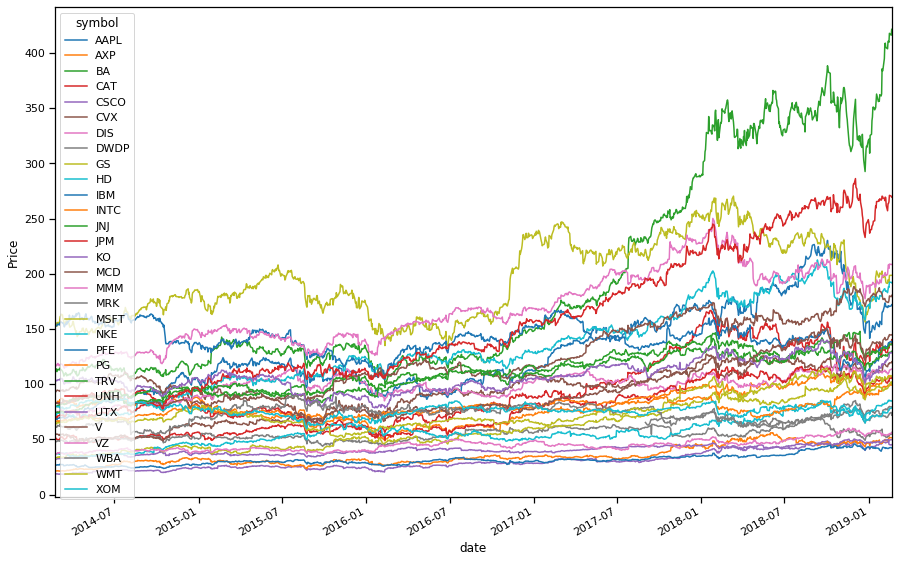

In [11]:
df.plot(figsize=(15,10))
plt.ylabel('Price');

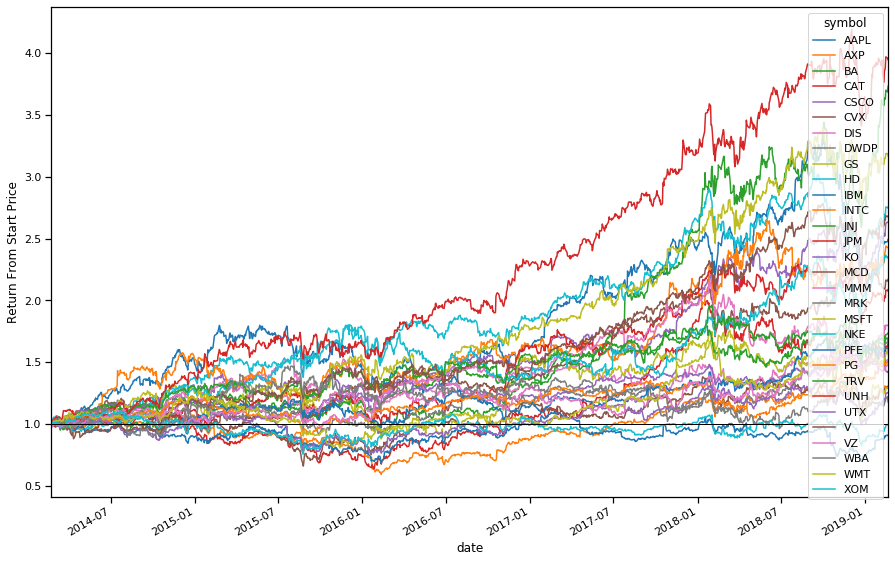

In [24]:
returnfstart = df.apply(lambda x: x / x[0])
returnfstart.plot(figsize=(15,10)).axhline(1, lw=1, color='black')
plt.ylabel('Return From Start Price');

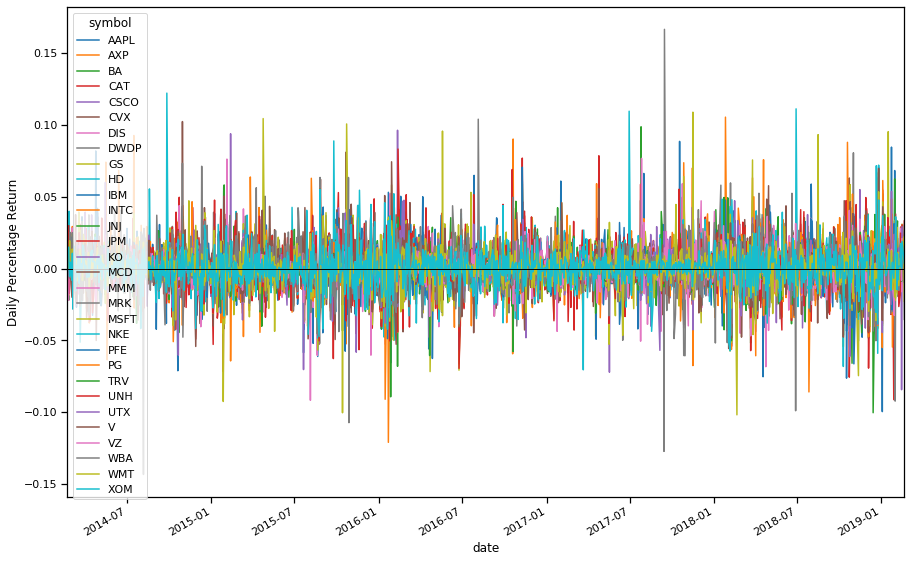

In [20]:
df.pct_change().plot(figsize=(15,10))
plt.axhline(0, lw=1)
#plt.axhline(0, color='black', lw=1)
plt.ylabel('Daily Percentage Return');

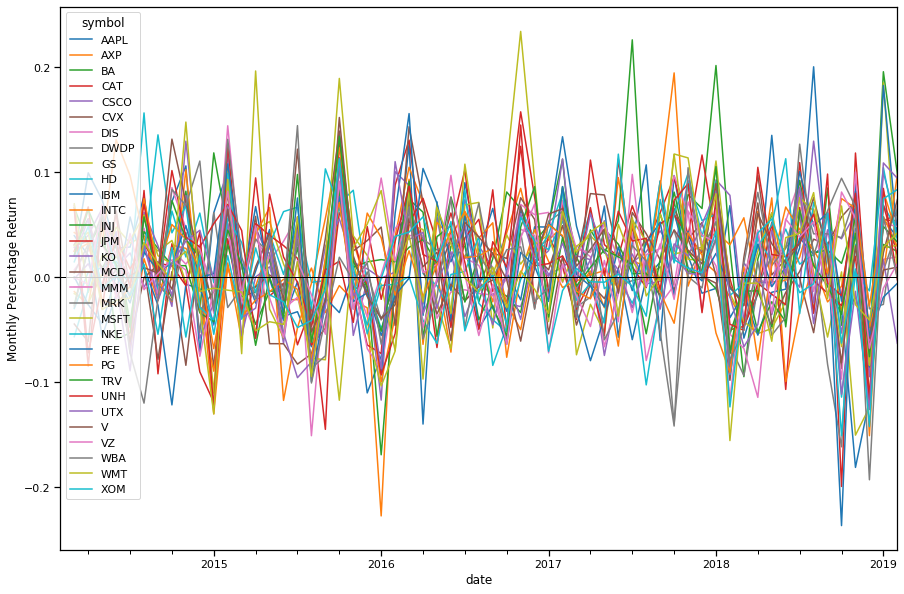

In [22]:
# Resample df to business months, take last observation as value 
monthly = df.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change().plot(figsize=(15,10))
plt.axhline(0, color='black', lw=1)
plt.ylabel('Monthly Percentage Return');

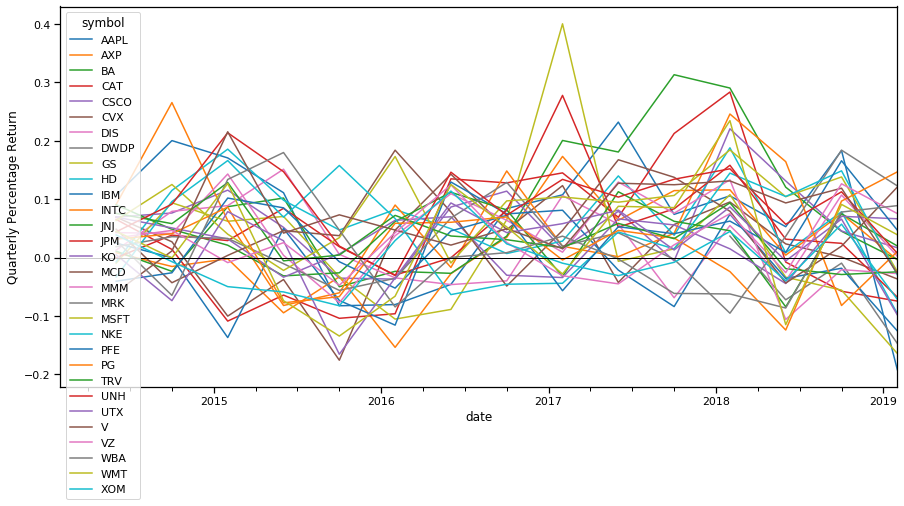

In [27]:
# Resample df to quarters, take the mean as value per quarter
quarterly = df.resample('4M').mean()

# Calculate the quarterly percentage change
quarterly.pct_change().plot(figsize=(15,7))
plt.axhline(0, color='black', lw=1)
plt.ylabel('Quarterly Percentage Return');

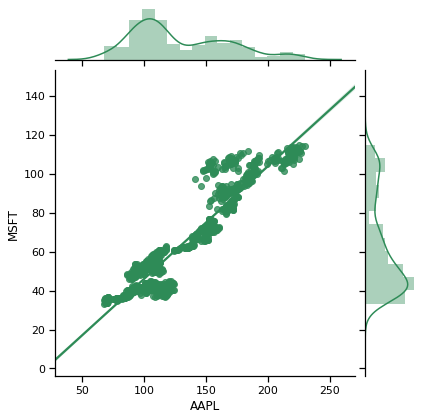

In [29]:
sns.jointplot('AAPL', 'MSFT', df, kind='reg', color='seagreen');

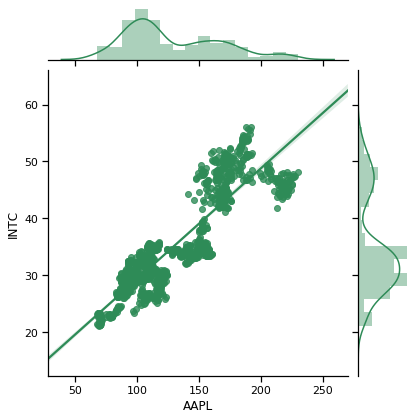

In [30]:
sns.jointplot('AAPL', 'INTC', df, kind='reg', color='seagreen');

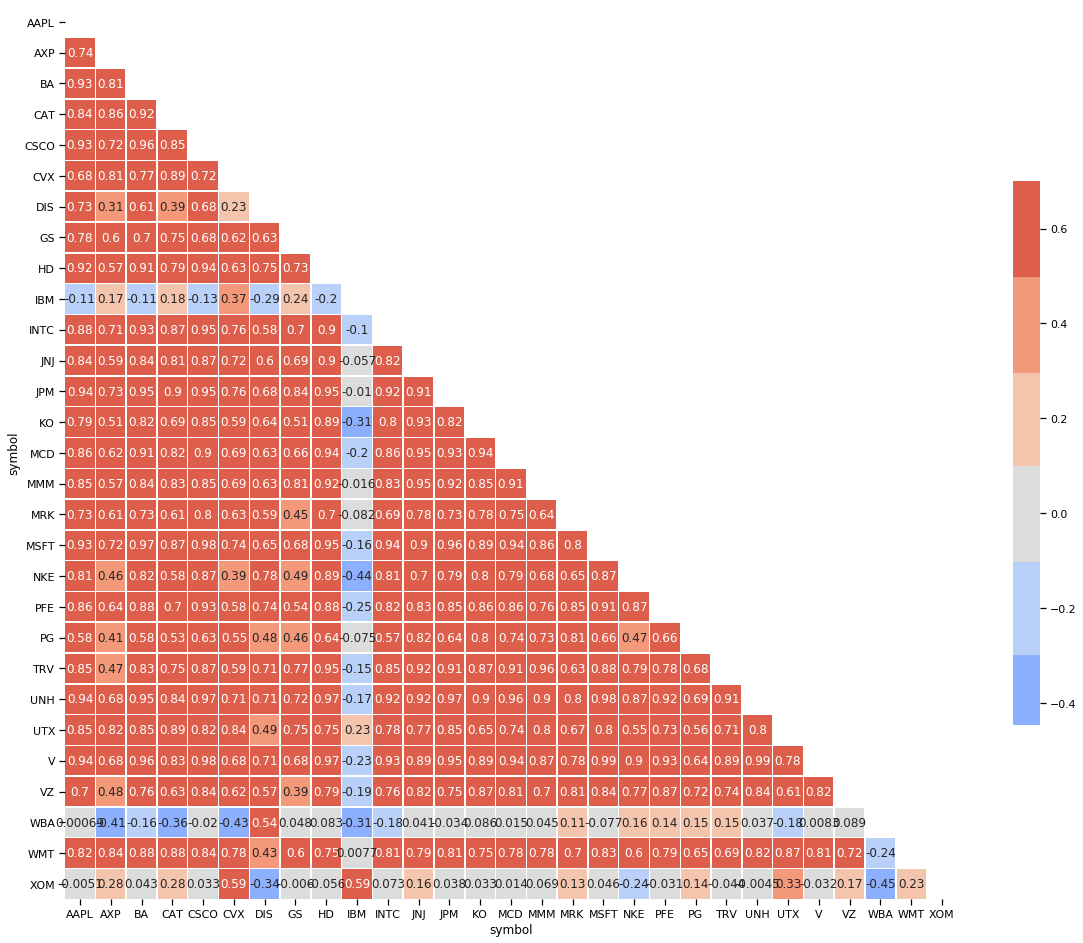

In [58]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
cmap = sns.color_palette("coolwarm", 7)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.7, center=0, annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5});

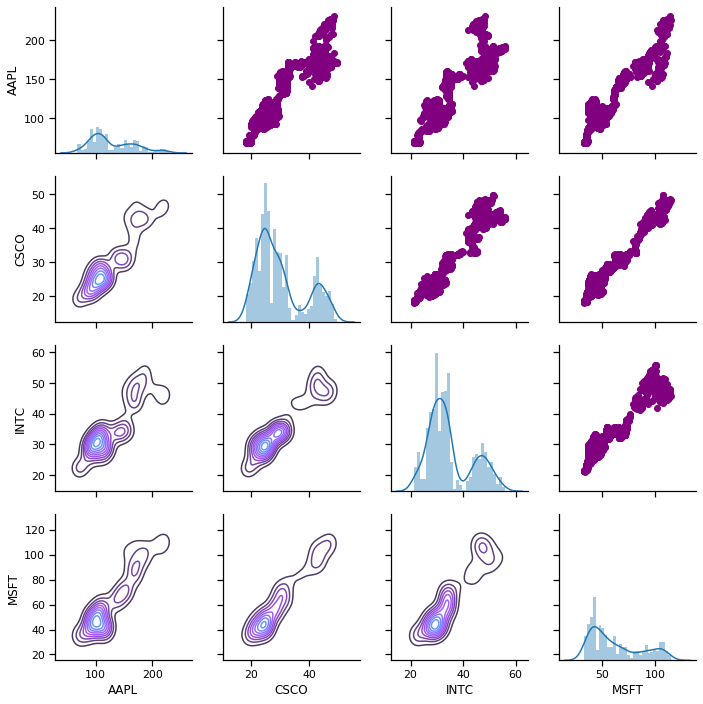

In [45]:
fig = sns.PairGrid(df[['AAPL', 'CSCO', 'INTC', 'MSFT']].dropna())
# define top, bottom and diagonal plots
fig.map_upper(plt.scatter, color='purple')
fig.map_lower(sns.kdeplot, cmap='cool_d')
fig.map_diag(sns.distplot, bins=30);

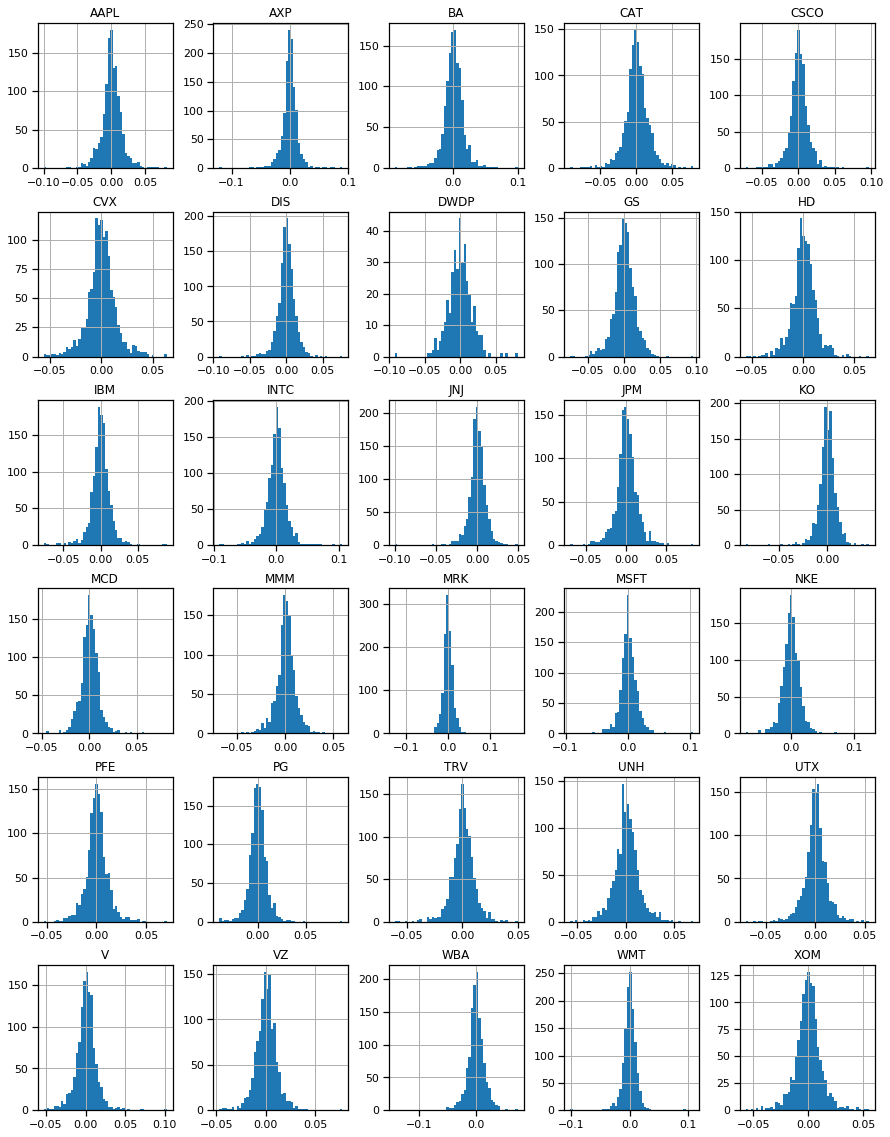

In [47]:
daily_pct_c = df/ df.shift(1) -1
daily_pct_c.hist(bins=50, figsize=(15,20))
plt.show()

In [48]:
display(daily_pct_c.describe())

symbol,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DWDP,GS,HD,...,PFE,PG,TRV,UNH,UTX,V,VZ,WBA,WMT,XOM
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,367.000000,1257.000000,1257.000000,...,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000
mean,0.000846,0.000300,0.001158,0.000548,0.000860,0.000308,0.000404,-0.000264,0.000311,0.000874,...,0.000438,0.000364,0.000492,0.001176,0.000246,0.000872,0.000370,0.000255,0.000431,0.000067
std,0.015393,0.013544,0.014810,0.016424,0.013384,0.013876,0.011716,0.016921,0.014606,0.011772,...,0.011157,0.009370,0.010314,0.012928,0.011563,0.013231,0.010616,0.015695,0.012281,0.011809
min,-0.099607,-0.121008,-0.089290,-0.091261,-0.072145,-0.055666,-0.091708,-0.092274,-0.074557,-0.055988,...,-0.052992,-0.040065,-0.060536,-0.056461,-0.070330,-0.052698,-0.046810,-0.143374,-0.101832,-0.056903
25%,-0.005993,-0.005374,-0.006379,-0.007311,-0.005420,-0.006547,-0.005303,-0.009440,-0.007424,-0.004933,...,-0.005111,-0.004362,-0.004532,-0.005704,-0.005173,-0.005416,-0.005668,-0.006899,-0.005163,-0.005957
50%,0.000627,0.000554,0.001214,0.000360,0.000699,0.000168,0.000536,-0.000282,0.000422,0.000766,...,0.000000,0.000230,0.000603,0.000998,0.000425,0.001335,0.000538,0.000241,0.000525,0.000121
75%,0.008594,0.006601,0.009387,0.008943,0.007534,0.007294,0.006509,0.008920,0.008458,0.007172,...,0.005702,0.004946,0.006189,0.007913,0.006055,0.007632,0.006175,0.008205,0.006382,0.006140
max,0.081982,0.090286,0.098795,0.078608,0.096402,0.063374,0.076301,0.080675,0.095437,0.064120,...,0.070669,0.087986,0.049588,0.069037,0.053844,0.102442,0.076802,0.073372,0.108984,0.055159


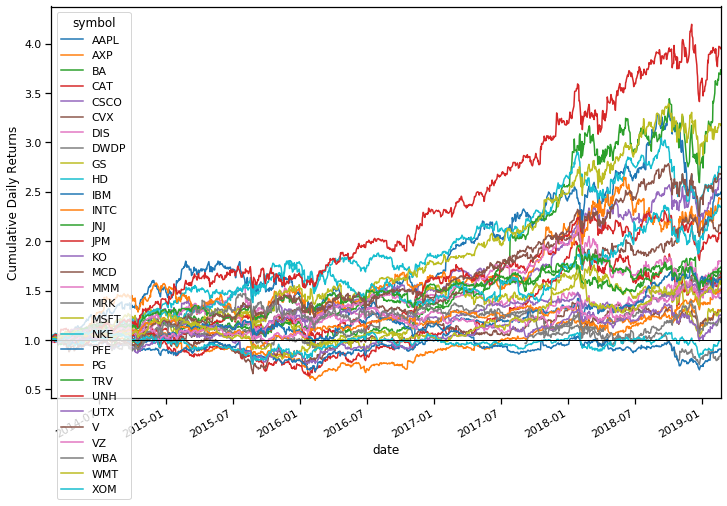

In [50]:
cum_daily_return = (1 + daily_pct_c).cumprod()

cum_daily_return.plot(figsize=(12,8))
plt.ylabel('Cumulative Daily Returns');
plt.axhline(1, color='black', lw=1)
plt.show()

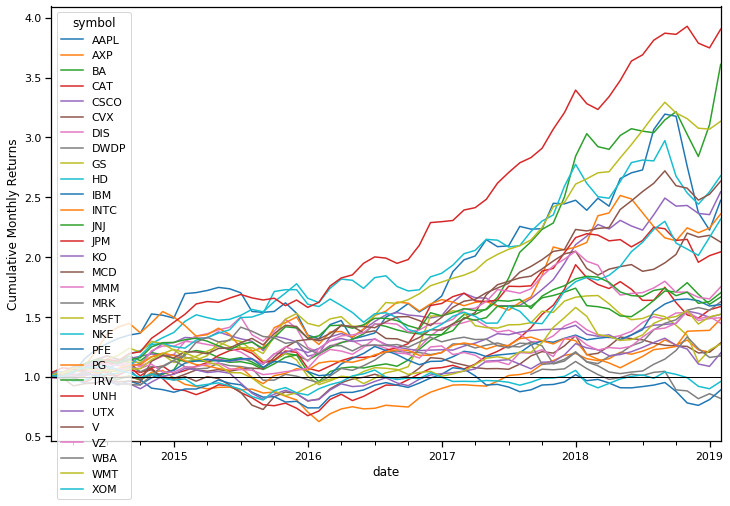

In [51]:
# Resample the cumulative daily return to cumulative monthly return 
cum_monthly_return = cum_daily_return.resample("M").mean()

cum_monthly_return.plot(figsize=(12,8))
plt.ylabel('Cumulative Monthly Returns');
plt.axhline(1, color='black', lw=1)
plt.show()

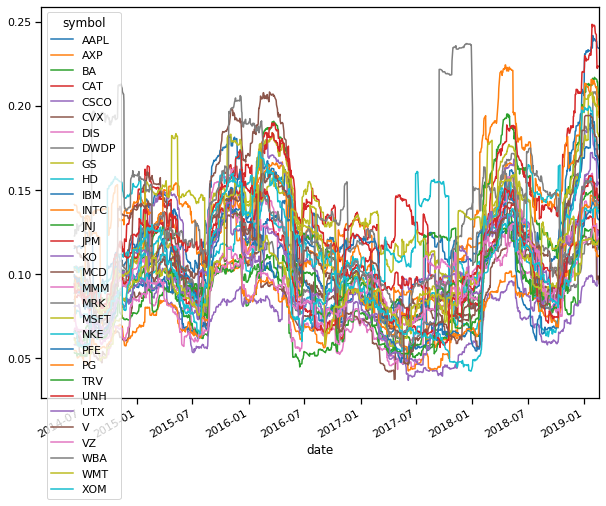

In [52]:
# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_c.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

In [76]:
#creating a separate dataset
AAPL_copy = pd.DataFrame(columns=['close'])
AAPL_copy.close = AAPL.close

AAPL_copy = AAPL_copy.reset_index()

AAPL_copy.head()

,date,close
0,2014-02-21,68.9821
1,2014-02-24,69.2841
2,2014-02-25,68.5631
3,2014-02-26,67.9446
4,2014-02-27,69.2999


In [78]:
#create features
add_datepart(AAPL_copy, 'date')
#AAPL_copy.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp
AAPL_copy.head()

KeyError: 'date'

In [ ]:
new_data['mon_fri'] = 0
for i in range(0,len(new_data)):
    if (new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i] == 4):
        new_data['mon_fri'][i] = 1
    else:
        new_data['mon_fri'][i] = 0

In [80]:
AAPL_copy.head()

,close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,68.9821,2014,2,8,21,4,52,False,False,False,False,False,False,1392940800
1,69.2841,2014,2,9,24,0,55,False,False,False,False,False,False,1393200000
2,68.5631,2014,2,9,25,1,56,False,False,False,False,False,False,1393286400
3,67.9446,2014,2,9,26,2,57,False,False,False,False,False,False,1393372800
4,69.2999,2014,2,9,27,3,58,False,False,False,False,False,False,1393459200


In [83]:
AAPL_copy['sma5'] = AAPL_copy['close'].rolling(5).mean()
AAPL_copy['sma30'] = AAPL_copy['close'].rolling(30).mean()
 
AAPL_copy.tail()

,close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,sma5,sma30
1253,170.18,2019,2,7,13,2,44,False,False,False,False,False,False,1550016000,170.22398,158.601393
1254,170.80,2019,2,7,14,3,45,False,False,False,False,False,False,1550102400,170.34200,159.053210
1255,170.42,2019,2,7,15,4,46,False,False,False,False,False,False,1550188800,170.34400,160.014453
1256,170.93,2019,2,8,19,1,50,False,False,False,False,False,False,1550534400,170.64400,160.791227
1257,172.03,2019,2,8,20,2,51,False,False,False,False,False,False,1550620800,170.87200,161.615620


In [84]:
drop_cols = ['Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
AAPL_copy = AAPL_copy.drop(drop_cols, axis=1)
AAPL_copy.tail()

,close,Year,Month,Week,Day,Dayofweek,Dayofyear,Elapsed,sma5,sma30
0,68.9821,2014,2,8,21,4,52,1392940800,NaN,NaN
1,69.2841,2014,2,9,24,0,55,1393200000,NaN,NaN
2,68.5631,2014,2,9,25,1,56,1393286400,NaN,NaN
3,67.9446,2014,2,9,26,2,57,1393372800,NaN,NaN
4,69.2999,2014,2,9,27,3,58,1393459200,68.81476,NaN


In [85]:
AAPL_copy.tail()

,close,Year,Month,Week,Day,Dayofweek,Dayofyear,Elapsed,sma5,sma30
1253,170.18,2019,2,7,13,2,44,1550016000,170.22398,158.601393
1254,170.80,2019,2,7,14,3,45,1550102400,170.34200,159.053210
1255,170.42,2019,2,7,15,4,46,1550188800,170.34400,160.014453
1256,170.93,2019,2,8,19,1,50,1550534400,170.64400,160.791227
1257,172.03,2019,2,8,20,2,51,1550620800,170.87200,161.615620


In [ ]:
# splitting into train and validation
train = AAPL_copy[:1004]
valid = AAPL_copy[1004:]

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)

# In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
# making predictions
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)